In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/euro-2024-players/euro2024_players.csv


# Uma avaliação estatistica dos jogadores da Eurocopa 2024 de futebol 

Esta analise visa descrever os dados disponíveis e verificar as correlações entre as diferentes variaveis.
Busca tambem entender se com os dados disponíveis, conseguimos estimar o valor de mercado de jogadores europeus não presentes nesta base.

O banco de dados detem as seguintes variaveis:
Nome, posição, Idade, Clube, Altura, pé principal, Convocações, gols pela seleção, Valor de mercado (Em milhões de Euros) e Nacionalidade.

## Avaliações estatisticas do banco de dados

In [2]:
# Carregar o dataset
data = pd.read_csv('/kaggle/input/euro-2024-players/euro2024_players.csv')

# Exibir estatísticas descritivas do dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB
None


In [3]:
# Exibir descrição do dataset variaveis numericas
print(data.describe())

              Age      Height        Caps       Goals   MarketValue
count  623.000000  623.000000  623.000000  623.000000  6.230000e+02
mean    27.040128  184.181380   30.338684    4.152488  1.840903e+07
std      4.124275    6.569258   30.987902   10.086803  2.426195e+07
min     16.000000  167.000000    0.000000    0.000000  5.000000e+04
25%     24.000000  180.000000    7.000000    0.000000  2.900000e+06
50%     27.000000  185.000000   21.000000    1.000000  9.000000e+06
75%     30.000000  189.000000   42.000000    4.000000  2.500000e+07
max     41.000000  202.000000  206.000000  128.000000  1.800000e+08


In [4]:
# Estatísticas descritivas para variáveis categóricas
print(data.describe(include=['object']))


                         Name     Position             Club   Foot Country
count                     623          623              623    620     623
unique                    623           13              219      4      24
top     Marc-André ter Stegen  Centre-Back  Manchester City  right  Poland
freq                        1          125               13    436      27


**Distribuição das Variáveis**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


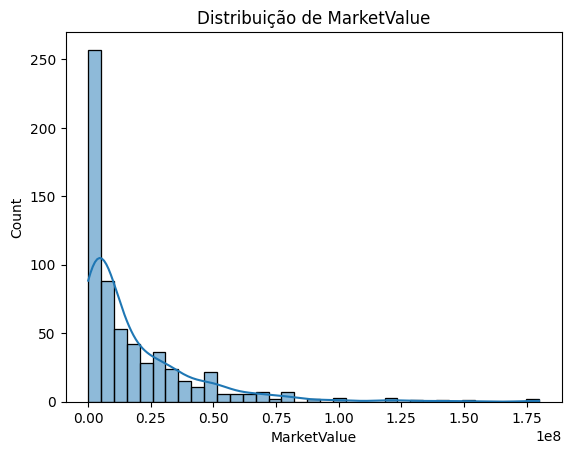

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


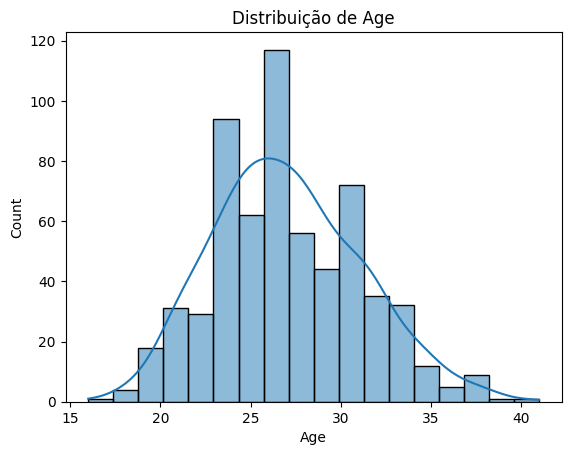

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


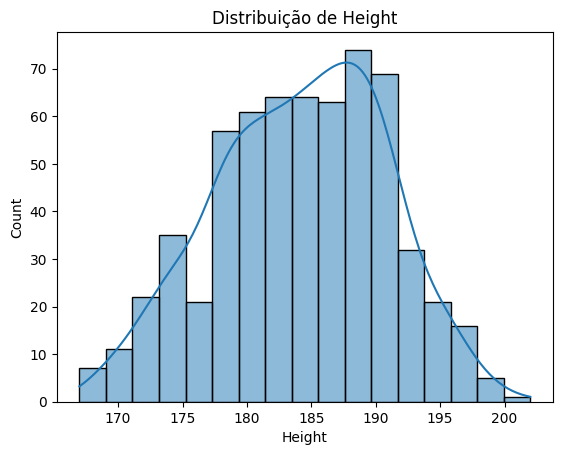

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


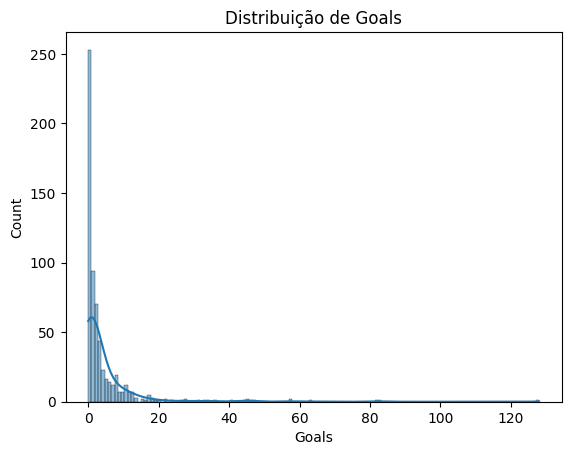

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


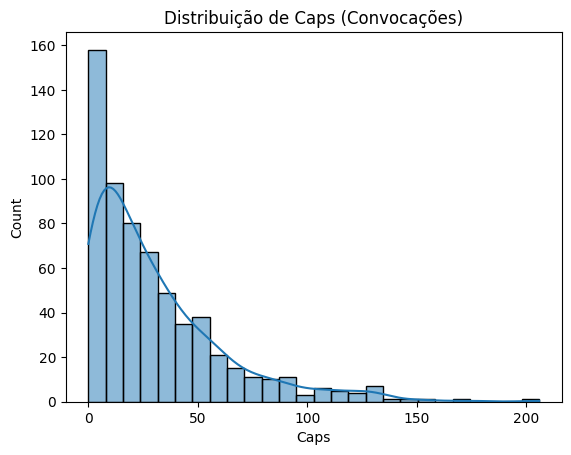

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição de 'MarketValue'
sns.histplot(data['MarketValue'], kde=True)
plt.title('Distribuição de MarketValue')
plt.show()

# Distribuição de 'Age'
sns.histplot(data['Age'], kde=True)
plt.title('Distribuição de Age')
plt.show()

# Distribuição de 'Height'
sns.histplot(data['Height'], kde=True)
plt.title('Distribuição de Height')
plt.show()

# Distribuição de 'Goals'
sns.histplot(data['Goals'], kde=True)
plt.title('Distribuição de Goals')
plt.show()

# Distribuição de 'Caps'
sns.histplot(data['Caps'], kde=True)
plt.title('Distribuição de Caps (Convocações)')
plt.show()

**Avaliando a correlação estatistica entre variaveis númericas**

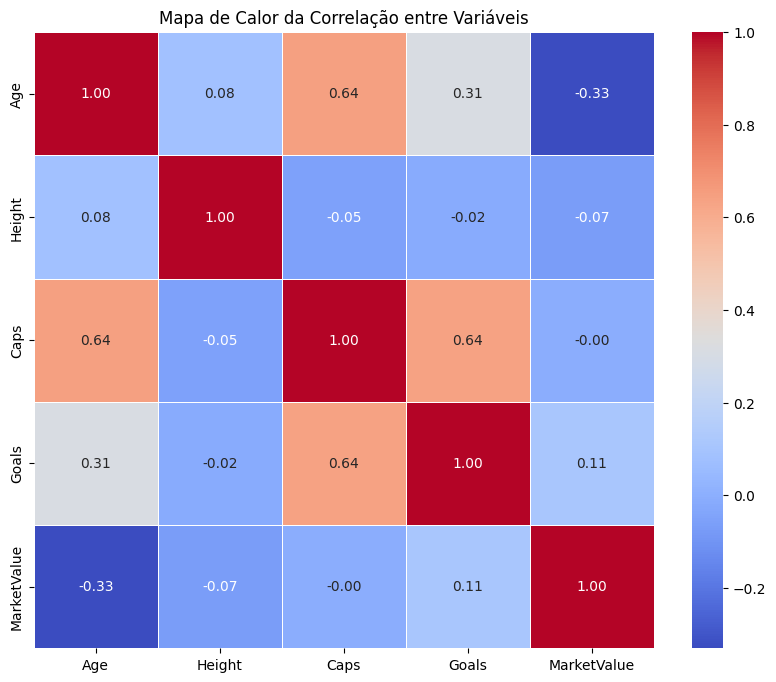

In [6]:
# Calculando a correlação entre as variáveis
correlation_matrix = data[['Age', 'Height', 'Caps', 'Goals', 'MarketValue']].corr()

# Criando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()

Insights:

A unica correlação estatistica existente, mas ainda considerada fraca, presente entre as variaveis numericas é a do número de convocações (Caps) com o número de gols pela seleção (Goals) e a idade (Age).
As tres variaveis tendem a subir juntas em ritmos diferentes não proporcionais.

**Análise de Variáveis Categóricas**

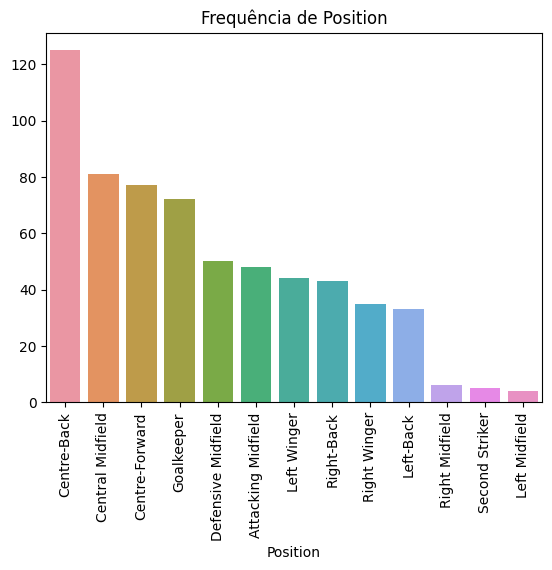

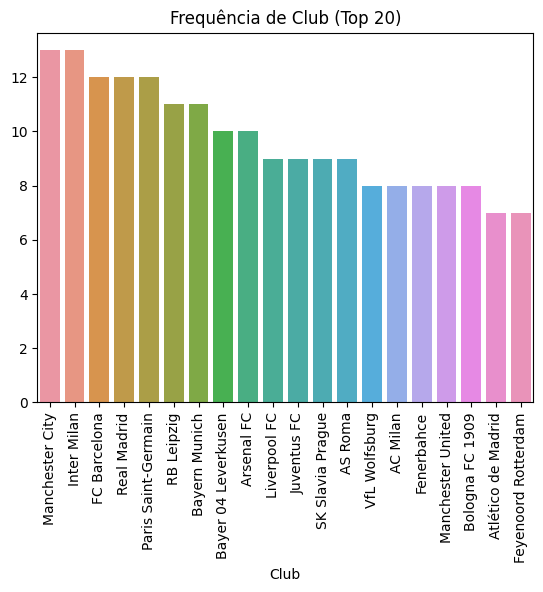

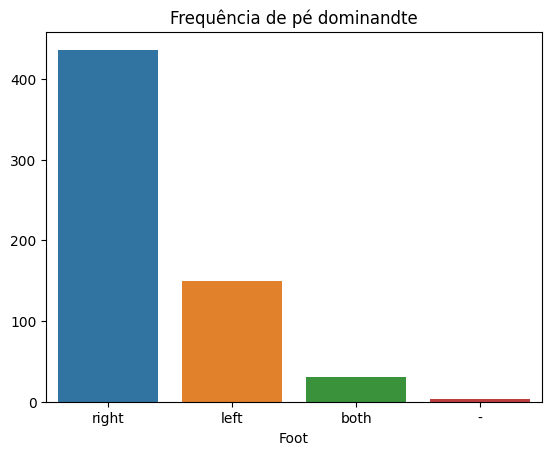

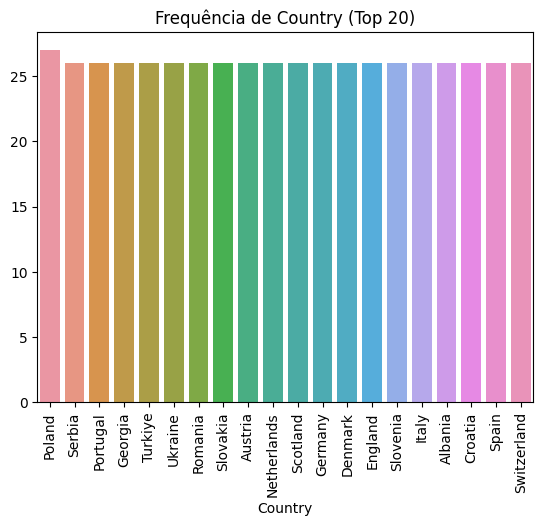

In [7]:
# Frequência de 'Position'
position_counts = data['Position'].value_counts()
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title('Frequência de Position')
plt.xticks(rotation=90)
plt.show()

# Frequência de 'Club'
club_counts = data['Club'].value_counts().head(20)  # Mostrar apenas os 20 principais clubes
sns.barplot(x=club_counts.index, y=club_counts.values)
plt.title('Frequência de Club (Top 20)')
plt.xticks(rotation=90)
plt.show()

# Frequência de 'Foot'
foot_counts = data['Foot'].value_counts()
sns.barplot(x=foot_counts.index, y=foot_counts.values)
plt.title('Frequência de pé dominandte')
plt.show()

# Frequência de 'Country'
country_counts = data['Country'].value_counts().head(20)  # Mostrar apenas os 20 principais países
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Frequência de Country (Top 20)')
plt.xticks(rotation=90)
plt.show()

**Relação entre Variáveis Categóricas e valor de mercado (MarketValue)**

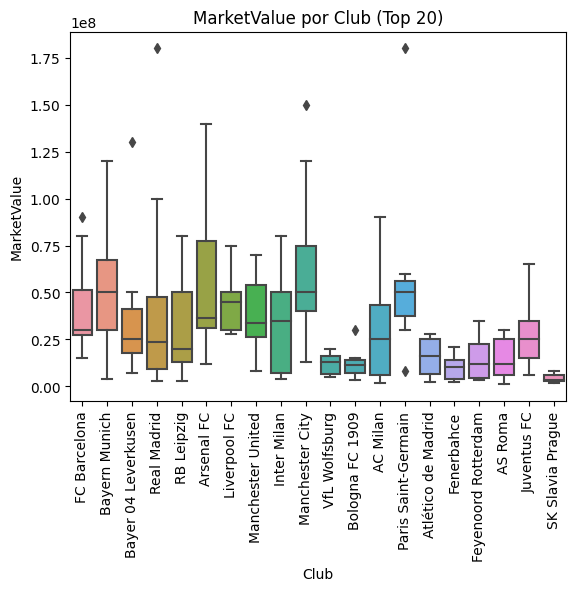

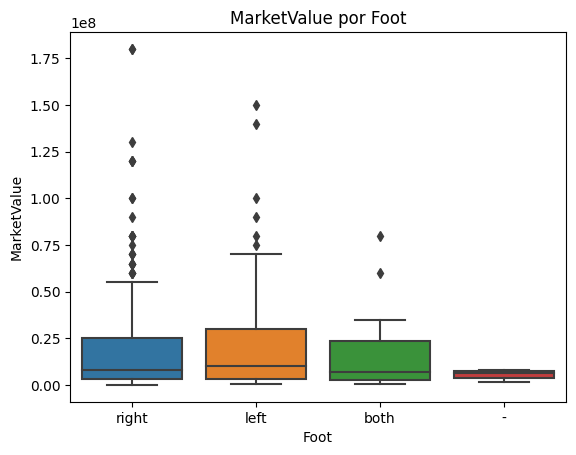

In [8]:
# Boxplot de 'MarketValue' por 'Club' (Top 20 clubes)
top_20_clubs = data['Club'].value_counts().index[:20]
df_top_20_clubs = data[data['Club'].isin(top_20_clubs)]
sns.boxplot(x='Club', y='MarketValue', data=df_top_20_clubs)
plt.title('MarketValue por Club (Top 20)')
plt.xticks(rotation=90)
plt.show()

# Boxplot de 'MarketValue' por 'Foot'
sns.boxplot(x='Foot', y='MarketValue', data=data)
plt.title('MarketValue por Foot')
plt.show()

**Avaliando as seleções com jogadores mais valiosos**

Os valores maximos são de Jude Belliham e Lyllian Mbapee, avaliados aproximadamente em 175 milhões de euros

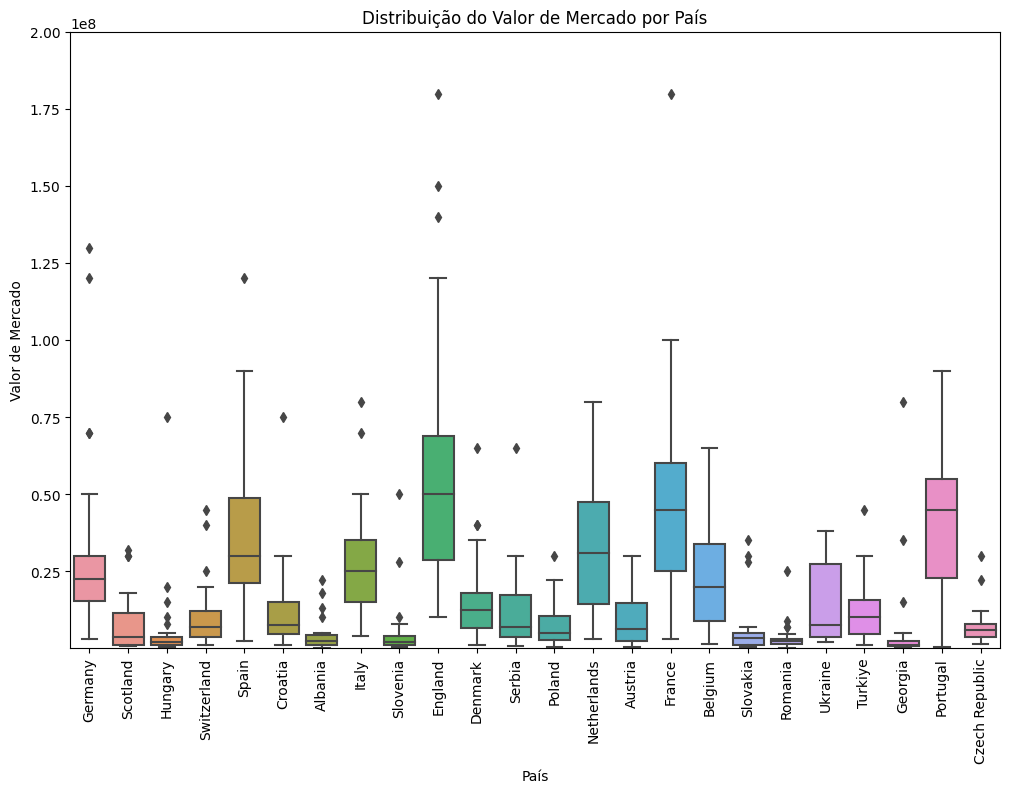

In [9]:
# Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='Country', y='MarketValue', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição do Valor de Mercado por País')
plt.xlabel('País')
plt.ylabel('Valor de Mercado')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor leitura

# Ajustar os limites do eixo y para valores inteiros
plt.ylim(100000, 200000000)  # Define o limite inferior como 0 e o superior como 200

# Mostrar o gráfico
plt.show()

**Avaliando as posições mais valorizadas**

OBS: Os valores maximos são de Jude Belliham e Lyllian Mbapee, avaliados aproximadamente em 175 milhões de euros

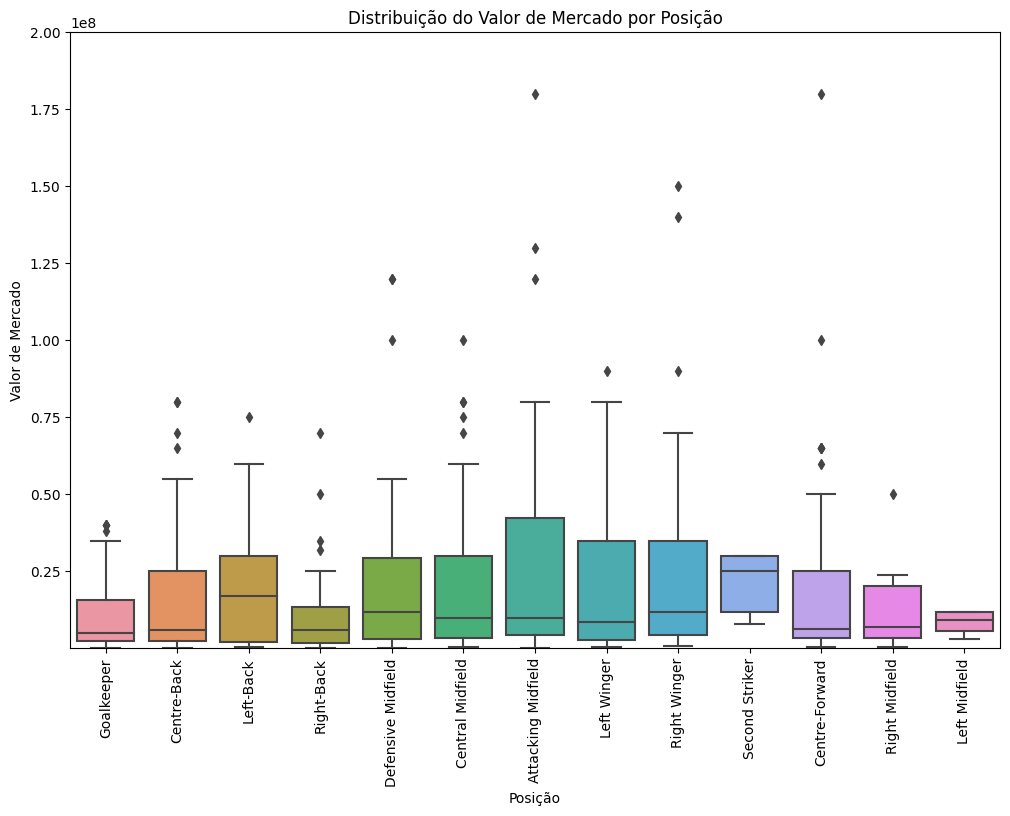

In [10]:
# Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='Position', y='MarketValue', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição do Valor de Mercado por Posição')
plt.xlabel('Posição')
plt.ylabel('Valor de Mercado')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor leitura

# Ajustar os limites do eixo y para valores inteiros
plt.ylim(100000, 200000000)  # Define o limite inferior como 0 e o superior como 200

# Mostrar o gráfico
plt.show()

**Avaliando as faixas etarias mais valorizadas**

OBS: Os valores maximos são de Jude Belliham e Lyllian Mbapee, avaliados aproximadamente em 175 milhões de euros

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


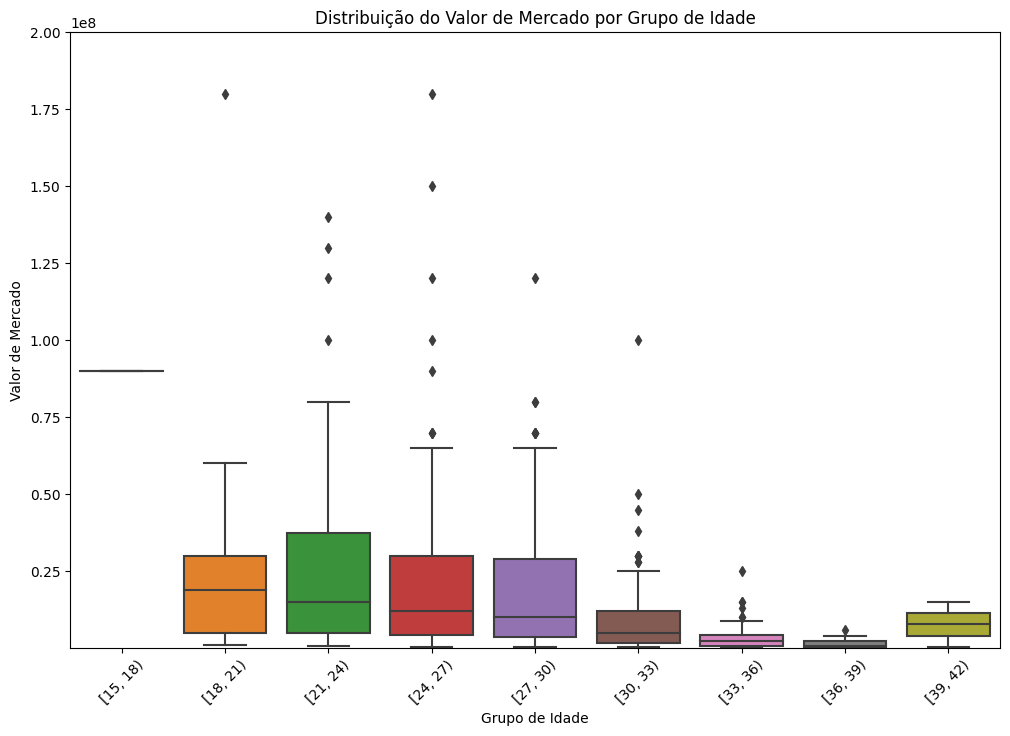

In [11]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma nova coluna para agrupar a variável Age em intervalos de três anos
data['AgeGroup'] = pd.cut(data['Age'], bins=range(15, 45, 3), right=False)

# Remover linhas com valores nulos em 'AgeGroup' ou 'MarketValue' (se houver)
data = data.dropna(subset=['AgeGroup', 'MarketValue'])

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='AgeGroup', y='MarketValue', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição do Valor de Mercado por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Valor de Mercado')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor leitura

# Ajustar os limites do eixo y para valores inteiros
plt.ylim(100000, 200000000)  # Define o limite inferior como 0 e o superior como 200

# Mostrar o gráfico
plt.show()

**Avaliando as faixas de altura mais valorizadas**

OBS: Os valores maximos são de Jude Belliham e Lyllian Mbapee, avaliados aproximadamente em 175 milhões de euros

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


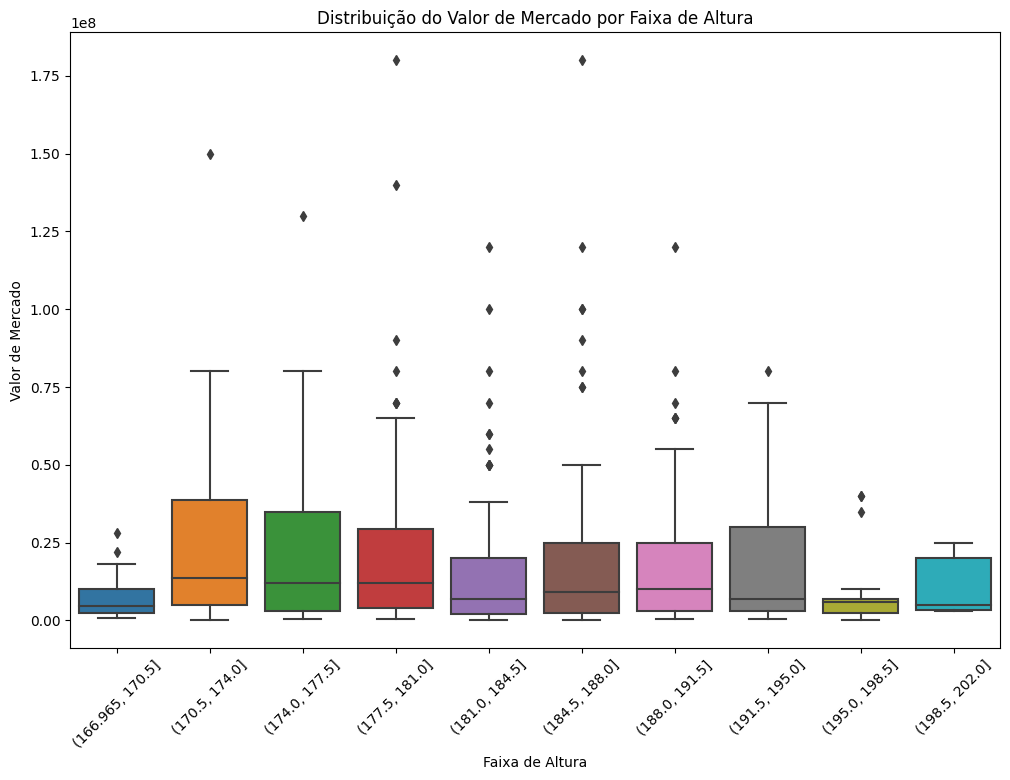

In [12]:
# Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma nova coluna para agrupar a variável Height em dez faixas
data['HeightGroup'] = pd.cut(data['Height'], bins=10)

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='HeightGroup', y='MarketValue', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição do Valor de Mercado por Faixa de Altura')
plt.xlabel('Faixa de Altura')
plt.ylabel('Valor de Mercado')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor leitura

# Mostrar o gráfico
plt.show()

**Avaliando a exepericencia por seleção mais valorizada**

OBS: Os valores maximos são de Jude Belliham e Lyllian Mbapee, avaliados aproximadamente em 175 milhões de euros

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


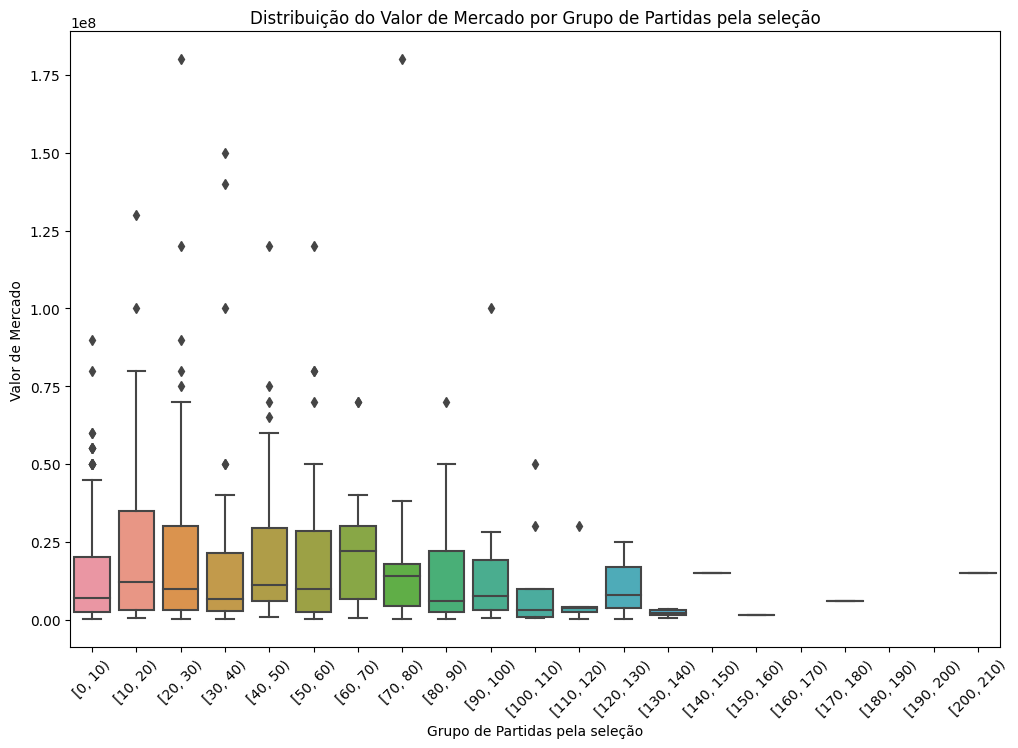

In [13]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma nova coluna para agrupar a variável Caps de 10 em 10
data['CapsGroup'] = pd.cut(data['Caps'], bins=range(0, data['Caps'].max() + 10, 10), right=False)

# Remover linhas com valores nulos em 'CapsGroup' ou 'MarketValue' (se houver)
data = data.dropna(subset=['CapsGroup', 'MarketValue'])

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='CapsGroup', y='MarketValue', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição do Valor de Mercado por Grupo de Partidas pela seleção')
plt.xlabel('Grupo de Partidas pela seleção')
plt.ylabel('Valor de Mercado')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor leitura

# Mostrar o gráfico
plt.show()

**Verificando atributos fisicos de cada selação**

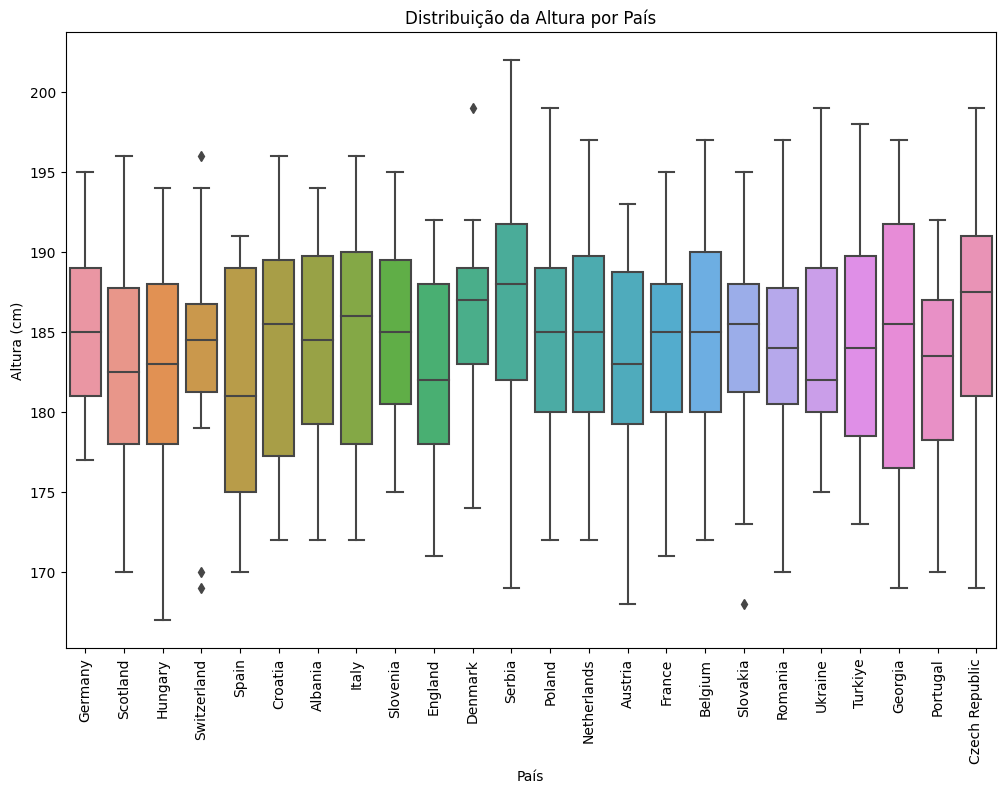

In [14]:
# Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='Country', y='Height', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição da Altura por País')
plt.xlabel('País')
plt.ylabel('Altura (cm)')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor leitura

# Mostrar o gráfico
plt.show()

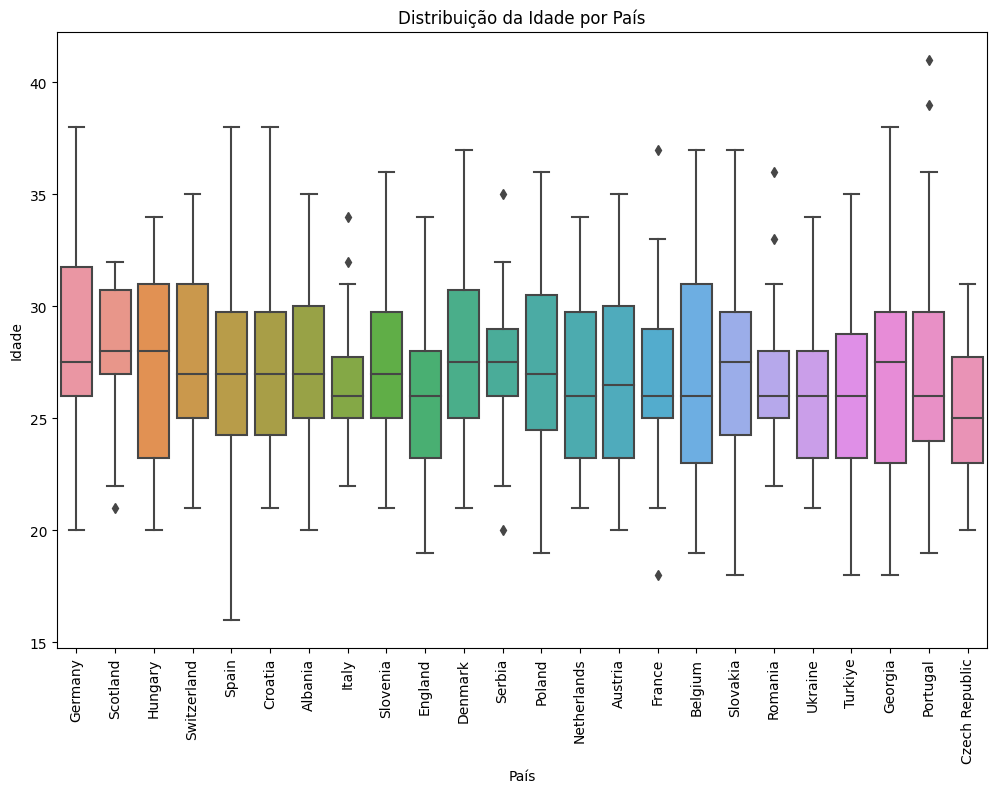

In [15]:
# Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='Country', y='Age', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição da Idade por País')
plt.xlabel('País')
plt.ylabel('Idade')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor leitura

# Mostrar o gráfico
plt.show()

## Engenharia de variaveis

In [16]:
# Verificar valores nulos
print(data.isnull().sum())

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
AgeGroup       0
HeightGroup    0
CapsGroup      0
dtype: int64


In [17]:
# Preencher valores nulos de 'Foot' com a moda (valor mais frequente)
foot_mode = data['Foot'].mode()[0]
data['Foot'] = data['Foot'].fillna(foot_mode)

**Codificação de Variáveis Categóricas**

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Verifique quais colunas existem no dataframe
existing_columns = ['Position', 'Club', 'Foot', 'Country']
columns_to_encode = [col for col in existing_columns if col in data.columns]

# Codificação one-hot para as colunas que existem
data = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)


**Criação de Novas Variáveis**

In [19]:
# Razão de Caps por Goals (indicando a eficiência do jogador)
data['Caps_per_Goal'] = data['Caps'] / (data['Goals'] + 1)  # +1 para evitar divisão por zero

# Agrupar Idade em faixas etárias (jovens, meia-idade, veteranos)
bins = [0, 20, 30, 40, 100]
labels = ['Jovem', 'Meia-Idade', 'Veterano', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Codificação one-hot para 'Age_Group'
data = pd.get_dummies(data, columns=['Age_Group'], drop_first=True)

**Escalonamento de Variáveis**

In [20]:
from sklearn.preprocessing import StandardScaler

# Selecionar variáveis numéricas
numerical_features = ['Age', 'Height', 'Caps', 'Goals', 'Caps_per_Goal']

# Escalonamento padrão (mean=0, std=1)
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Seleção de modelos e treinamento para predição do valor de mercado (MarketValue)

**Divisão dos Dados de treinamento e teste**

In [21]:
from sklearn.model_selection import train_test_split

# Definir variáveis independentes (X) e dependentes (y)
X = data.drop(columns=['Name', 'MarketValue','AgeGroup', 'HeightGroup', 'CapsGroup'])  # Exclua também outras variáveis irrelevantes, se houver
y = data['MarketValue']

# Dividir os dados (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Seleção de Modelos**

Escolher modelos adequados para o problema de regressão. Vamos considerar os seguintes modelos:

* Regressão Linear
* Árvores de Decisão
* Random Forest
* Gradient Boosting
* Regressão Ridge e Lasso (para regularização)

**Regressão Linear**

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Treinar Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Avaliar com cross-validation
linear_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
print(f'Regressão Linear - Média R²: {linear_scores.mean()}')

Regressão Linear - Média R²: -1.3935147589883568e+24


**Arvore de decisão**

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Treinar Árvores de Decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Avaliar com cross-validation
tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring='r2')
print(f'Árvores de Decisão - Média R²: {tree_scores.mean()}')

Árvores de Decisão - Média R²: -0.18192686142192122


**Radon Forest**

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Treinar Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Avaliar com cross-validation
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f'Random Forest - Média R²: {rf_scores.mean()}')

Random Forest - Média R²: 0.12600662841895205


**Gradient Boosting**

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Treinar Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)

# Avaliar com cross-validation
gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print(f'Gradient Boosting - Média R²: {gb_scores.mean()}')

Gradient Boosting - Média R²: 0.15335868510608824


**Regressão Ridge e Lasso**

In [26]:
from sklearn.linear_model import Ridge, Lasso

# Treinar Regressão Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Avaliar com cross-validation
ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
print(f'Regressão Ridge - Média R²: {ridge_scores.mean()}')

# Treinar Regressão Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Avaliar com cross-validation
lasso_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='r2')
print(f'Regressão Lasso - Média R²: {lasso_scores.mean()}')

Regressão Ridge - Média R²: 0.24986494909947998


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.446e+15, tolerance: 2.746e+13
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.814e+16, tolerance: 2.942e+13
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.536e+16, tolerance: 3.133e

Regressão Lasso - Média R²: 0.030968729665421836


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.099e+16, tolerance: 3.163e+13
  model = cd_fast.enet_coordinate_descent(


**Ajuste Fino dos Hiperparâmetros Random Forest**

In [27]:
from sklearn.model_selection import GridSearchCV

# Exemplo de ajuste fino para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Melhores parâmetros para Random Forest: {grid_search.best_params_}')
print(f'Melhor R² obtido: {grid_search.best_score_}')

Melhores parâmetros para Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Melhor R² obtido: 0.5894013094063274


**Avaliação Final no Conjunto de Teste**

In [28]:
# Usar o melhor modelo encontrado (exemplo com Random Forest)
best_rf_model = grid_search.best_estimator_

# Previsões no conjunto de teste
y_pred = best_rf_model.predict(X_test)

# Avaliação no conjunto de teste
test_r2 = r2_score(y_test, y_pred)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'R² no conjunto de teste: {test_r2}')
print(f'RMSE no conjunto de teste: {test_rmse}')

R² no conjunto de teste: 0.5326067252819506
RMSE no conjunto de teste: 15050964.968779078


**Gráfico de Comparação entre predições e valores reais da variavel MarketValue**

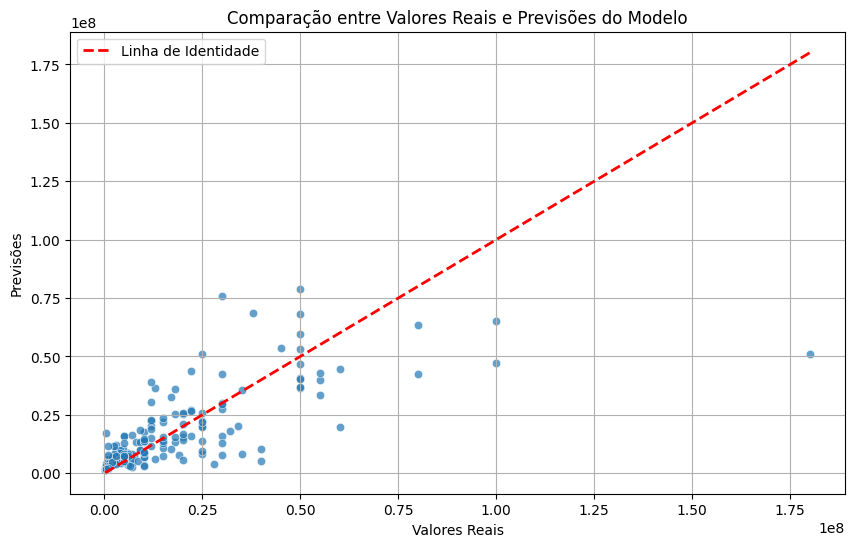

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Passo 1: Gerar previsões no conjunto de teste
y_pred = best_rf_model.predict(X_test)

# Passo 2: Criar um DataFrame para visualização
comparison_df = pd.DataFrame({
    'Real Values': y_test,
    'Predictions': y_pred
})

# Passo 3: Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real Values', y='Predictions', data=comparison_df, alpha=0.7)

# Adicionar uma linha de identidade (y=x) para referência
plt.plot([comparison_df['Real Values'].min(), comparison_df['Real Values'].max()],
         [comparison_df['Real Values'].min(), comparison_df['Real Values'].max()],
         color='red', linestyle='--', linewidth=2, label='Linha de Identidade')

# Configurar o gráfico
plt.title('Comparação entre Valores Reais e Previsões do Modelo')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()

**Importancia das variaveis no melhor modelo de predição Random Forest após tunagem dos hyperparametros**

In [30]:
# Importância das variáveis para Random Forest
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Converta o DataFrame para uma lista de tuplas e exiba as primeiras 20
importance_list = importance_df.head(20).values.tolist()
for feature, importance in importance_list:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Age, Importance: 0.1622268979110175
Feature: Country_England, Importance: 0.13801210245238213
Feature: Club_Manchester City, Importance: 0.06717620327818435
Feature: Goals, Importance: 0.058907025861965806
Feature: Caps, Importance: 0.05591765919063566
Feature: Country_France, Importance: 0.05207152243536223
Feature: Height, Importance: 0.042066314699604555
Feature: Country_Portugal, Importance: 0.036651011669055884
Feature: Country_Germany, Importance: 0.03480314011397433
Feature: Country_Netherlands, Importance: 0.03436382199582613
Feature: Country_Spain, Importance: 0.03148011838497334
Feature: Caps_per_Goal, Importance: 0.03126653993722953
Feature: Club_Arsenal FC, Importance: 0.031144463258248524
Feature: Country_Italy, Importance: 0.019111348671692015
Feature: Club_Real Madrid, Importance: 0.016437983440865115
Feature: Club_Inter Milan, Importance: 0.016435274466786425
Feature: Club_Bayern Munich, Importance: 0.01589745114068665
Feature: Age_Group_Veterano, Importance: 0

# Resumo dos Resultados

**Analise descritiva:**

Com os dados disponíveis foi possível ententer os diferentes perfis de jogadores que comporam as seleções da EURO 2024.

* A altura dos jogadores não está correlacionada estatisticamente ao seu valor de mercado, número de gols, número de convocações.
* A altura dos jogadores se concentra entre 1,77 metros e 1,93 metros.
* A idade dos jogadores tem pequena mas existente correlação com o número de gols pela seleção e o número de convocações.
* A idade dos jogadore se concentra entre 23 e 32 anos.
* As posições centrais no campo são as de maior frequencia, com dominio dos defensores centrais.
* Os jogadores de Man city, Bayern, Arsenal e PSG são os mais valorizados.
* Os jogadores mais valorizados estão entre 18 e 30 anos.
* A mediana do valor de mercado para cada faixa de idade, de tres em tres anos, tende a baixar com o aumento da faiza etaria.
* As seleções finalistas do campeonato (Espanha e Inglaterra) tem as menores medianas na distribuição de altura de jogadores.

Entre outras constatações possíveis a partir dos graficos acima.

**Analise diagnóstica:**

A correlação baixa mas existente entre convocações, gols pela seleção e idade ocorre porque quanto mais idade um jogador tem, maior a chance dele ter experiencia por clubes, assim aumentando a chance de convocação, assim aumentando a chance de marcar gols em jogos pela seleção.

Os jogadores tendem a ter maior valor de mercado quando mais jovens, em parte, por suas capacidades fisicas maiores. 
Dados de capacidades fisicas devem ser buscados e avaliados nos proximos modelos.

**Analise preditiva:**

Modelo Selecionado para predição do valor de mercado (MarketValue): 
Ramdom forest após tunagem dos hyperparametros.

Melhores parâmetros para Random Forest a partir do metodo Grid Search: 
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Performance do Modelo: 
A partir dos dados disponíveis, o modelo mostrou baixa performance ao predizer valores de mercado de jogadores de fora da base de dados da Eurocopa2024.

R² no conjunto de teste: 0.5326 (Nesta métrica busca-se 0.90 para 90% de acerto nas predições)

RMSE no conjunto de teste: 15.050.964.9600 
(O RMSE muito alto, de aproximadamente 15 milhões, indica que, em média, as previsões do modelo estão erradas por cerca de 15 milhões de euros em relação aos valores reais)

**Analise prescritiva**

Ainda que o modelo de predição atual precise de mais dados de resultados esportivos e capacidades fisicas, é possível perceber que o aumento de valor de mercado dos jogadores avaliados se dá em maior parte até a faixa de 32 anos de idade.

Jogadores fora deste perfil não tendem a possibilitar vendas entre clubes com ganhos financeiros, pois seu valor de mercado baixa com o passar dos anos.



## Principais Insights do modelo preditivo

A lista de importancia nas variaveis abaixo mostra que dentro dos dados dispoíveis e somente utilizando calculos entre eles, uma alta importancia na idade (age) e na nacionalidade Inglesa (Country_England) para predizer os valores de mercado dos jogadores.



É possível perceber o aumento do valor de mercado do jogador quanto mais jovem e quanto mais relacionado com os clubes ingleses listados ele é. Esta é uma ocorrencia comum para jogadores nascidos na Inglaterra (Country_England)



* Feature: Age, Importance: 0.1622268979110175
* Feature: Country_England, Importance: 0.13801210245238213
* Feature: Club_Manchester City, Importance: 0.06717620327818435
* Feature: Goals, Importance: 0.058907025861965806
* Feature: Caps, Importance: 0.05591765919063566
* Feature: Country_France, Importance: 0.05207152243536223
* Feature: Height, Importance: 0.042066314699604555
* Feature: Country_Portugal, Importance: 0.036651011669055884
* Feature: Country_Germany, Importance: 0.03480314011397433
* Feature: Country_Netherlands, Importance: 0.03436382199582613
* Feature: Country_Spain, Importance: 0.03148011838497334
* Feature: Caps_per_Goal, Importance: 0.03126653993722953
* Feature: Club_Arsenal FC, Importance: 0.031144463258248524
* Feature: Country_Italy, Importance: 0.019111348671692015
* Feature: Club_Real Madrid, Importance: 0.016437983440865115
* Feature: Club_Inter Milan, Importance: 0.016435274466786425
* Feature: Club_Bayern Munich, Importance: 0.01589745114068665
* Feature: Age_Group_Veterano, Importance: 0.012941046805636127
* Feature: Club_Liverpool FC, Importance: 0.011111203938182925
* Feature: Club_Bayer 04 Leverkusen, Importance: 0.008455800937658879

# Recomendações finais

Com base nas avaliações, faz-se necessária a obtenção de dados de resultados esportivos e de capacidades fisicas dos jogadores europeus já listados aqui, para melhor predição de seus valores de mercado. Aprofundar as avaliações em jogadores abaixo dos 30 anos deve retornar quais variaveis esportivas mais afetam o valor de mercado dos jogadores mais valiosos.

Próximos Passos: Quantificar de forma objetiva os dados das capacidades fisicas, como resistencia, velocidade média e maxima, quilometros percorridos por partida, entre outros, e dos resultados esportivos dos jogadores aqui listados, como partidas oficiais jogadas, minutos em campo, em quais ligas estas partidas ocorreram, numero de assistencias, gols, passes corretos e errados, perdas de bola, recuperações de bola, utilização  e taxa de acerto do pé dominante e do não dominante, entre outros.

Adicionando estes novos dados aos já disponíveis neste dataframe, para nova modelagem em Ramdon Forest, pode-se obter novas importancias entre as novas variaveis e as já utilizadas.